In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta  
from datetime import datetime

In [2]:
df = pd.read_csv('../libs/facebook_ad_Senate.csv')
df.shape

(46261, 30)

In [3]:
df.head()

id    state       candidate       party competitiveness status  \
0  3.166070e+14  Arizona  Kyrsten Sinema  Democratic          Tossup   Open   
1  3.187180e+14  Arizona  Kyrsten Sinema  Democratic          Tossup   Open   
2  5.374410e+14  Arizona  Kyrsten Sinema  Democratic          Tossup   Open   
3  2.851120e+14  Arizona  Kyrsten Sinema  Democratic          Tossup   Open   
4  2.545940e+14  Arizona  Kyrsten Sinema  Democratic          Tossup   Open   

  vote_results  vote_pct             ad_start_time              ad_stop_time  \
0          Won       0.5  2018-10-28T01:07:34+0000  2018-11-07T02:00:00+0000   
1          Won       0.5  2018-10-19T18:41:31+0000  2018-11-07T02:00:00+0000   
2          Won       0.5  2018-10-22T14:43:04+0000  2018-11-07T02:00:00+0000   
3          Won       0.5  2018-11-01T16:20:49+0000  2018-11-07T02:00:00+0000   
4          Won       0.5  2018-11-05T03:32:45+0000  2018-11-07T03:00:00+0000   

   ...  impressions_upper male female age18_24 age25_34 age35_44 age45_54  \
0  ...              999.0  1.0    0.0     0.06     0.16     0.20     0.24   
1  ...              999.0  1.0    0.0     0.14     0.18     0.23     0.21   
2  ...             4999.0  1.0    0.0     0.06     0.11     0.17     0.23   
3  ...             1999.0  1.0    0.0     0.07     0.11     0.19     0.26   
4  ...            14999.0  1.0    0.0     0.00     0.26     0.43     0.29   

   age55_64  age65plus                                    ad_snapshot_url  
0      0.17       0.16  https://www.facebook.com/ads/archive/render_ad...  
1      0.11       0.12  https://www.facebook.com/ads/archive/render_ad...  
2      0.21       0.22  https://www.facebook.com/ads/archive/render_ad...  
3      0.21       0.17  https://www.facebook.com/ads/archive/render_ad...  
4      0.02       0.00  https://www.facebook.com/ads/archive/render_ad...  

[5 rows x 30 columns]

In [4]:
print(f"Number of unique states: {df.state.nunique()}")
print(f"Number of unique candidates: {df.candidate.nunique()}")
print(f"Number of unique parties: {df.party.nunique()}")

Number of unique states: 35
Number of unique candidates: 71
Number of unique parties: 4


In [25]:
df.groupby(['state', 'candidate'])['id'].count().sort_values(ascending=False)

state          candidate       
Texas          Beto O'Rourke       9057
Massachusetts  Elizabeth Warren    4824
Tennessee      Phil Bredesen       4487
Arizona        Kyrsten Sinema      2740
Wisconsin      Tammy Baldwin       2205
                                   ... 
Utah           Mitt Romney           31
Maryland       Ben Cardin            20
Hawaii         Ron Curtis            18
Utah           Jenny Wilson           9
New Mexico     Gary Johnson           5
Name: id, Length: 71, dtype: int64

## Missing data
First let us look at the missing data statistics. As can be seen below, 6 columns have missing values 

In [5]:
df.isna().sum().sort_values(ascending=False)[:6]

ad_link_description    12129
ad_stop_time            9658
ad_link_title           7803
ad_link_caption         7743
funding_entity           456
ad_body_text             308
dtype: int64

The funding entity is mandatory for facebook ads, but as seen above, 456 ads have missing funding entity. The following 5 candidates had the highest number of ads with missing entities

In [6]:
df[df.funding_entity.isna()][['id', 'state','candidate', 'party']].groupby(['state','candidate', 'party'])['id'].count().sort_values(ascending=False).reset_index().head()



state         candidate       party  id
0     Nevada       Jacky Rosen  Democratic  78
1   Missouri  Claire McCaskill  Democratic  66
2    Indiana      Joe Donnelly  Democratic  51
3    Florida       Bill Nelson  Democratic  29
4  Tennessee     Phil Bredesen  Democratic  26

## State wise ad count distribution
The following two graphs show the count of total ads and unique ads grouped by the state. As can be seen from both the graphs, Texas had the highest number of ads (both totala and unique) and the count is much higher than the reamaining states

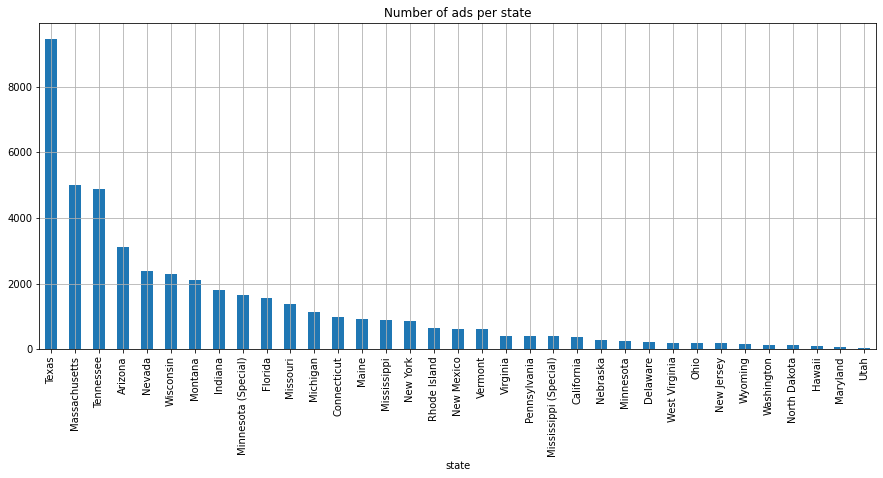

Texas, Massachusetts, Tennessee and Arizona have the highest number of ads featured


In [7]:
df.groupby("state").ad_body_text.count().sort_values(ascending=False).plot(kind="bar", \
figsize=(15,6), title="Number of ads per state", grid = True)

plt.show()
print("Texas, Massachusetts, Tennessee and Arizona have the highest number of ads featured")

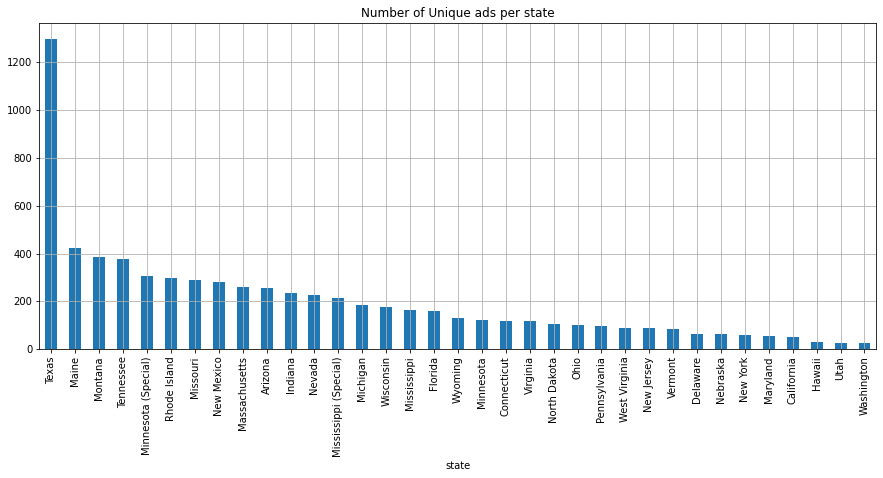

Texas, Maine, Monatana and Tennessee have the highest number of ads featured


In [8]:
df.groupby("state").ad_body_text.nunique().sort_values(ascending=False).plot(kind="bar", \
figsize=(15,6), title="Number of Unique ads per state", grid = True)

plt.show()
print("Texas, Maine, Monatana and Tennessee have the highest number of ads featured")

The following graph shows the count of total ads for the states with highest count grouped by party. As can be seen from the graph, the democratic ads are much more in number than democrats, Libertarian and Independent together. 

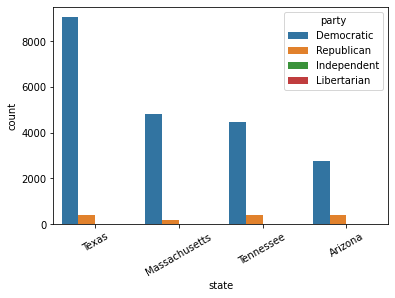

In the top four states with ad counts, Democrats have a significantly higher number of ads than repulicans


In [9]:
higher_states = ['Texas', 'Massachusetts', 'Tennessee', 'Arizona']
sns.countplot(df[(df.state).isin(higher_states)]['state'], 
              order=df[(df.state).isin(higher_states)]['state'].value_counts(ascending=False).index, 
              hue=df['party'])
plt.xticks(rotation=30)
plt.show()
print("In the top four states with ad counts, Democrats have a significantly higher number of ads than repulicans")

## Effect of ad count on election results
Figure (a) below shows the boxplot for ad count for winning and losing candidates. Since the graph had a lot of outliers (the ~8500 outlier comes from Texas), the graph on the right is formed by removing ad count above 1800. As can be seen, candidates who won had a slighly higher median of ad count than the candidates who lost

In [13]:
result_adcount.head()

state         candidate vote_results    id
0      Arizona    Kyrsten Sinema          Won  2740
1      Arizona    Martha McSally         Lost   392
2   California  Dianne Feinstein          Won   125
3   California     Kevin de León         Lost   238
4  Connecticut      Chris Murphy          Won   954

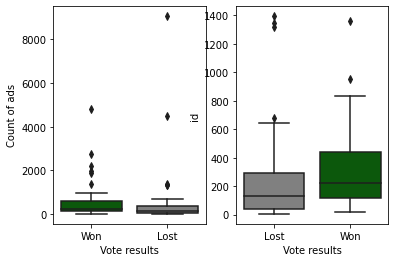

Figure (a) shows the boxplot for vote results for candidates in different states and the count of ads for the candidate. Figure (b) shows the same, with a few outliers removed


In [16]:
fig, axs = plt.subplots(ncols=2)

result_adcount = df.groupby(['state', 'candidate', 'vote_results'])['id'].count().reset_index()
my_pal = {"Won": "darkgreen", "Lost": "gray"}
sns.boxplot(x='vote_results', y='id', data=result_adcount, ax=axs[0], palette=my_pal)
axs[0].set_xlabel('Vote results')
axs[0].set_ylabel('Count of ads')
sns.boxplot(x='vote_results', y='id', data=result_adcount[result_adcount.id<1800], ax=axs[1], palette=my_pal)
axs[1].set_xlabel('Vote results')
plt.show()
print('Figure (a) shows the boxplot for vote results for candidates in different states and the count of ads for the candidate. Figure (b) shows the same, with a few outliers removed')

In [31]:
df[df.state=='New York']

id     state           candidate       party  \
25681  1.343390e+15  New York        Chele Farley  Republican   
25682  1.769350e+15  New York        Chele Farley  Republican   
25683  3.931760e+14  New York        Chele Farley  Republican   
25684  5.220920e+14  New York        Chele Farley  Republican   
25685  2.124100e+14  New York        Chele Farley  Republican   
...             ...       ...                 ...         ...   
26548  8.099310e+14  New York  Kirsten Gillibrand  Democratic   
26549  6.839730e+14  New York  Kirsten Gillibrand  Democratic   
26550  1.905270e+15  New York  Kirsten Gillibrand  Democratic   
26551  1.921470e+15  New York  Kirsten Gillibrand  Democratic   
26552  4.838460e+14  New York  Kirsten Gillibrand  Democratic   

        competitiveness      status vote_results  vote_pct    ad_start_time  \
25681  Solid Democratic  Challenger         Lost      0.33  7/30/2018 14:23   
25682  Solid Democratic  Challenger         Lost      0.33  7/26/2018 13:02   
25683  Solid Democratic  Challenger         Lost      0.33  7/26/2018 13:02   
25684  Solid Democratic  Challenger         Lost      0.33  8/11/2018 11:11   
25685  Solid Democratic  Challenger         Lost      0.33  7/26/2018 12:59   
...                 ...         ...          ...       ...              ...   
26548  Solid Democratic   Incumbent          Won      0.67  5/25/2018 16:47   
26549  Solid Democratic   Incumbent          Won      0.67  10/5/2018 17:18   
26550  Solid Democratic   Incumbent          Won      0.67  10/5/2018 19:25   
26551  Solid Democratic   Incumbent          Won      0.67  10/5/2018 19:25   
26552  Solid Democratic   Incumbent          Won      0.67  10/5/2018 19:25   

          ad_stop_time  ...  impressions_upper  male female age18_24 age25_34  \
25681   8/6/2018 15:59  ...              999.0  1.00   0.00     0.00     0.00   
25682  7/31/2018 15:59  ...             5999.0  0.71   0.28     0.02     0.06   
25683  7/31/2018 15:59  ...            14999.0  0.71   0.28     0.03     0.10   
25684   8/15/2018 3:59  ...           124999.0  0.70   0.30     0.02     0.06   
25685  7/31/2018 15:59  ...             7999.0  0.66   0.32     0.06     0.09   
...                ...  ...                ...   ...    ...      ...      ...   
26548              NaN  ...              999.0  0.00   1.00     0.00     0.00   
26549              NaN  ...              999.0  0.00   1.00     0.00     0.00   
26550              NaN  ...              999.0  0.00   1.00     0.00     0.00   
26551              NaN  ...              999.0  0.00   1.00     0.00     0.00   
26552              NaN  ...              999.0  0.00   1.00     0.00     0.00   

      age35_44 age45_54  age55_64  age65plus  \
25681     0.00     1.00      0.00       0.00   
25682     0.11     0.23      0.30       0.27   
25683     0.15     0.26      0.26       0.20   
25684     0.10     0.22      0.30       0.30   
25685     0.11     0.20      0.29       0.24   
...        ...      ...       ...        ...   
26548     0.00     0.00      0.50       0.50   
26549     0.00     0.14      0.36       0.50   
26550     0.00     1.00      0.00       0.00   
26551     0.00     0.00      0.00       1.00   
26552     1.00     0.00      0.00       0.00   

                                         ad_snapshot_url  
25681  https://www.facebook.com/ads/archive/render_ad...  
25682  https://www.facebook.com/ads/archive/render_ad...  
25683  https://www.facebook.com/ads/archive/render_ad...  
25684  https://www.facebook.com/ads/archive/render_ad...  
25685  https://www.facebook.com/ads/archive/render_ad...  
...                                                  ...  
26548  https://www.facebook.com/ads/archive/render_ad...  
26549  https://www.facebook.com/ads/archive/render_ad...  
26550  https://www.facebook.com/ads/archive/render_ad...  
26551  https://www.facebook.com/ads/archive/render_ad...  
26552  https://www.facebook.com/ads/archive/render_ad...  

[872 rows x 30 columns]

## Ad count grouped by the competitiveness of the race in that state
As can be seen from the graph below, the states where the competitiveness was 'Tossup' had significantly higher ad count. 

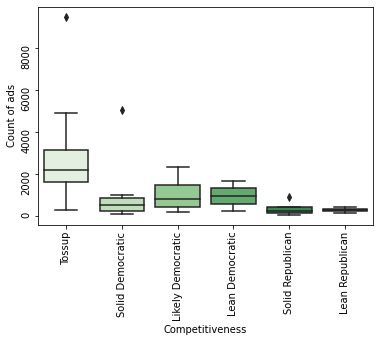

Figure (a) shows the boxplot for competitiveness different states and the count of ads in the state.


In [24]:
fig, axs = plt.subplots(ncols=1)

result_competitiveness = df.groupby(['state', 'competitiveness'])['id'].count().reset_index()
sns.boxplot(x='competitiveness', y='id', data=result_competitiveness, ax=axs, palette='Greens')
axs.tick_params(labelrotation=90)
axs.set_xlabel('Competitiveness')
axs.set_ylabel('Count of ads')

plt.show()
print('Figure (a) shows the boxplot for competitiveness different states and the count of ads in the state.')

## Ad run time

Using the ad start time and stop time, we calculated the duration for which each ad was run on facebook. The graph below shows the histogram for ad durartion in days

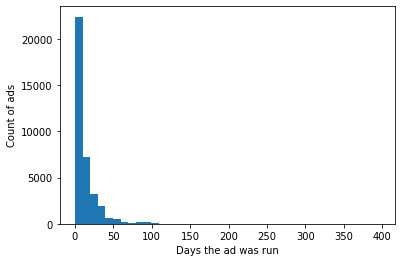

In [13]:
diff = pd.to_datetime(df.ad_stop_time) - pd.to_datetime(df.ad_start_time)
df['time run'] = pd.Series([i.total_seconds() for i in diff])
df['time run'] = df['time run']/(24*60*60)

plt.hist(df['time run'], bins=40)
plt.xlabel('Days the ad was run')
plt.ylabel('Count of ads')
plt.show()

The graph below shows the boxplot of ad run time and party. There doesn't seem to be any significant difference

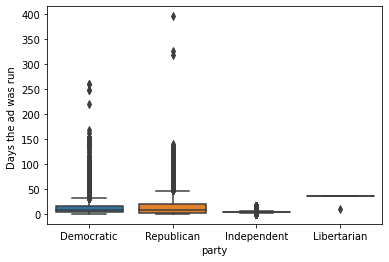

In [14]:
sns.boxplot(x='party', y='time run', data=df)
plt.ylabel('Days the ad was run ')
plt.show()

In [15]:
def convert_to_datetime(date):
    if 'T' in str(date):
        date = date.split('T')[0]
        return datetime.strptime(date, '%Y-%m-%d')
    elif ' ' in str(date):
        date = date.split(' ')[0]
        return datetime.strptime(date, '%m/%d/%Y')
    else:
        return None

In [16]:
df['ad_start_time_datetime'] = df.ad_start_time.apply(convert_to_datetime)
df['ad_stop_time_datetime'] = df.ad_stop_time.apply(convert_to_datetime)

In [17]:
from collections import defaultdict

days = ((max(df['ad_start_time_datetime']) - min(df['ad_start_time_datetime']))/7).days

def compute_ads_in_week(df):
    ads_in_week = defaultdict(int)
    for i in range(days+1):
        date = min(df['ad_start_time_datetime']) + timedelta(days=7*i)
        for j in (df.index):
            if (date < df['ad_stop_time_datetime'][j]) & (date>df['ad_start_time_datetime'][j]):
                ads_in_week[date] += 1
    ads_in_week = pd.DataFrame.from_dict(ads_in_week, orient='index')
    ads_in_week.columns = ['ad_count']
    return ads_in_week

In [18]:
ads_in_week = compute_ads_in_week(df)
ads_in_week_dem = compute_ads_in_week(df[df.party=='Democratic'])
ads_in_week_rep = compute_ads_in_week(df[df.party=='Republican'])

The graph below plots the number of active ads on facebook for a timeline of April 2019 - April 2020. Graph (a) shows the total count, whereas (b) and (c) show the timeline for democrats and republicans respectively. As expected, the highest number of ads were run in teh end pf October, just before the elections

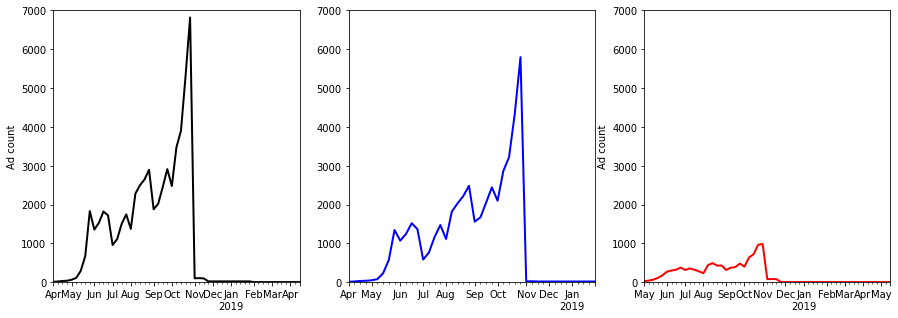

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

ads_in_week['ad_count'].plot(linewidth=2, ax=axs[0], color='k')
axs[0].set_ylim(0, 7000)
axs[0].set_ylabel('Ad count')
ads_in_week_dem['ad_count'].plot(linewidth=2, ax=axs[1], color='b')
axs[1].set_ylim(0, 7000)
ads_in_week_rep['ad_count'].plot(linewidth=2, ax=axs[2], color='r')
axs[2].set_ylim(0, 7000)
plt.ylabel('Ad count')
plt.show()

In [21]:
df.columns
print("Candidates with more than one funding entity")
pd.DataFrame(df.groupby(['candidate', 'funding_entity'])['id'].count().reset_index()).candidate.value_counts()[:11]

Candidates with more than one funding entity


Corey Stewart       4
Martha McSally      3
Phil Bredesen       3
Mick Rich           2
John James          2
Mike Espy           2
Chele Farley        2
Gary Johnson        2
Bill Nelson         2
Debbie Stabenow     2
Marsha Blackburn    2
Name: candidate, dtype: int64

In [22]:
df.spend_lower.describe()

count    46261.000000
mean       393.729059
std       1729.974239
min          0.000000
25%          0.000000
50%          0.000000
75%        200.000000
max      80000.000000
Name: spend_lower, dtype: float64

In [23]:
df.spend_upper.describe()

count    46261.000000
mean       563.071248
std       2103.222328
min         99.000000
25%         99.000000
50%         99.000000
75%        299.000000
max      89999.000000
Name: spend_upper, dtype: float64

In [24]:
df[df.spend_lower>=60000.0]

id       state         candidate       party competitiveness  \
19142  2.234290e+14    Missouri  Claire McCaskill  Democratic          Tossup   
24854  2.553960e+14  New Jersey         Bob Hugin  Republican          Tossup   
38911  3.256150e+14       Texas     Beto O'Rourke  Democratic          Tossup   

           status vote_results  vote_pct             ad_start_time  \
19142   Incumbent         Lost      0.46  2018-08-13T20:06:18+0000   
24854  Challenger         Lost      0.43          10/30/2018 14:32   
38911  Challenger         Lost      0.48  2018-09-21T16:19:39+0000   

                   ad_stop_time  ...  age18_24 age25_34 age35_44 age45_54  \
19142  2018-10-02T04:00:00+0000  ...      0.06     0.17     0.20     0.20   
24854           11/6/2018 20:00  ...      0.10     0.15     0.14     0.23   
38911  2018-10-08T02:00:00+0000  ...      0.04     0.14     0.22     0.22   

      age55_64 age65plus                                    ad_snapshot_url  \
19142     0.20      0.17  https://www.facebook.com/ads/archive/render_ad...   
24854     0.21      0.15  https://www.facebook.com/ads/archive/render_ad...   
38911     0.20      0.18  https://www.facebook.com/ads/archive/render_ad...   

        time run  ad_start_time_datetime  ad_stop_time_datetime  
19142  49.328958              2018-08-13             2018-10-02  
24854   7.227778              2018-10-30             2018-11-06  
38911  16.403021              2018-09-21             2018-10-08  

[3 rows x 33 columns]

In [25]:
print("As can be seen from the values below, majority of the ads have spending range diff of 99")
(df.spend_upper-df.spend_lower).value_counts()

As can be seen from the values below, majority of the ads have spending range diff of 99


99      42122
499      3302
999       547
4999      286
9999        4
dtype: int64

## Ad spending

For ad spending, Facebook only provides an upper bound and lower bound on the amount spent for each ad. The graph below shows the upper and lower bound of cumulative ad spending for each state. Texas again has the highest spending on ads

<ipython-input-26-6e71c21de70a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spending = df.groupby(['state', 'party'])['spend_lower', 'spend_upper'].sum().reset_index().sort_values(by='spend_upper', ascending=False)


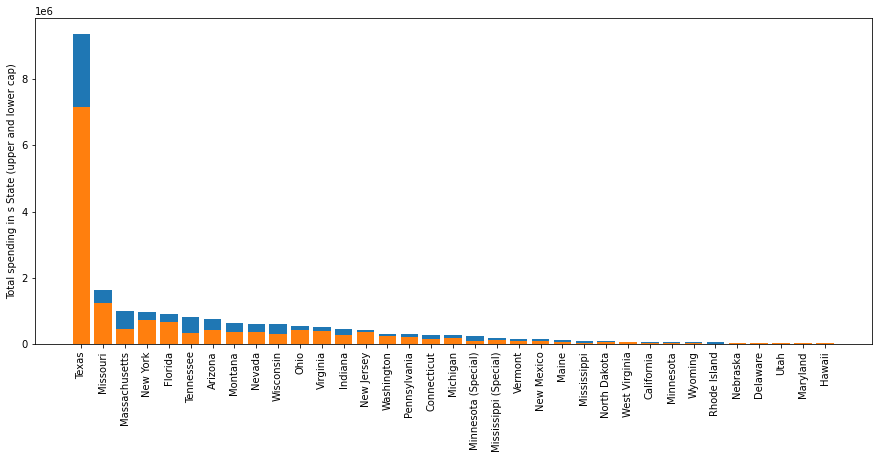

In [26]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
spending = df.groupby(['state', 'party'])['spend_lower', 'spend_upper'].sum().reset_index().sort_values(by='spend_upper', ascending=False)
p2 = ax.bar(spending['state'], (spending['spend_upper']))
p1 = ax.bar(spending['state'], spending['spend_lower'])
plt.xticks(rotation=90)
plt.ylabel('Total spending in s State (upper and lower cap)')
plt.show()

The graph below shows the cumulative spending (upper bound) for the four states with highest spending grouped by party. Democrats spent significantly higher than democrats on ads

<ipython-input-27-9ef303018546>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spending_by_state = pd.DataFrame(df.groupby(['state', 'party'])['spend_lower', 'spend_upper'].sum().reset_index()).sort_values(by='spend_upper', ascending=False)


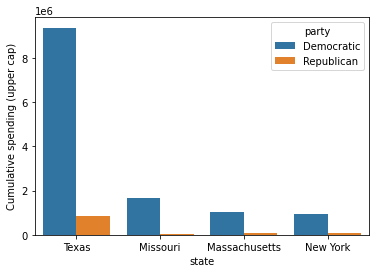

In [27]:
spending_by_state = pd.DataFrame(df.groupby(['state', 'party'])['spend_lower', 'spend_upper'].sum().reset_index()).sort_values(by='spend_upper', ascending=False)
spending_by_state = spending_by_state[spending_by_state.state.isin(['Texas', 'Missouri', 'Massachusetts', 'New York'])]
sns.barplot(x=spending_by_state['state'], y=spending_by_state['spend_upper'], hue=spending_by_state['party'])
plt.ylabel('Cumulative spending (upper cap)')
plt.show()

This graph shows the box plot for cumulative spending (upper bound) for candidates who won and lost. But due to the presence of a lot of outliers, figure (a) is not very informative. So removing some of the putliers, figure (b) shows that candidates who won spent slightly more on the facebook ads

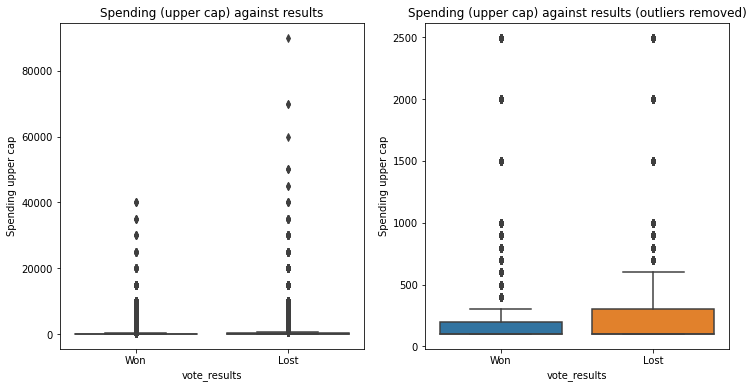

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(x='vote_results', y='spend_upper', data=df, ax=ax[0])
ax[0].set_ylabel('Spending upper cap')
ax[0].set_title('Spending (upper cap) against results')

sns.boxplot(x='vote_results', y='spend_upper', data=df[df.spend_upper<2500], ax=ax[1])
ax[1].set_ylabel('Spending upper cap')
ax[1].set_title('Spending (upper cap) against results (outliers removed)')


plt.show()

In [30]:
df[df['spend_upper']>2500].vote_results.value_counts()

Lost    1156
Won      644
Name: vote_results, dtype: int64

## Impressions 
Facebook provides an upper and lower bound on ad impressions. As can be seen from the graph below, highest cumulative impressions were observed for Texas

<ipython-input-31-066efbe343b9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spending = df.groupby(['state', 'party'])['impressions_lower', 'impressions_upper'].sum().reset_index().sort_values(by='impressions_upper', ascending=False)


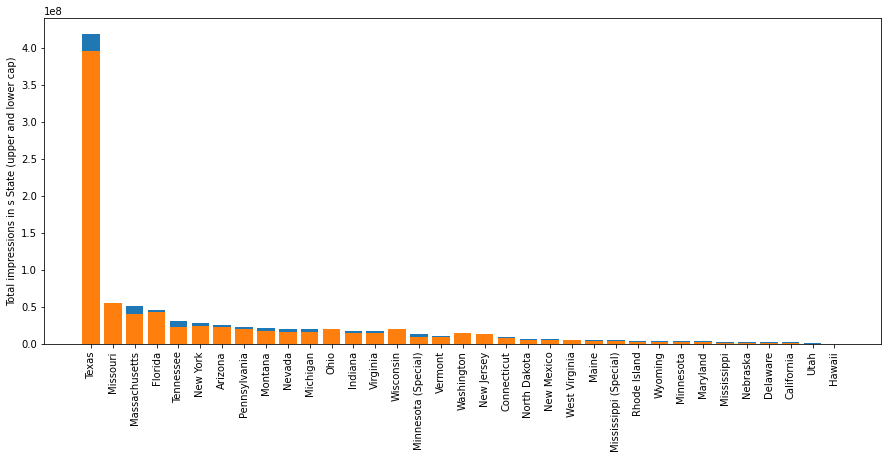

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
spending = df.groupby(['state', 'party'])['impressions_lower', 'impressions_upper'].sum().reset_index().sort_values(by='impressions_upper', ascending=False)
p2 = ax.bar(spending['state'], (spending['impressions_upper']))
p1 = ax.bar(spending['state'], spending['impressions_lower'])
plt.xticks(rotation=90)
plt.ylabel('Total impressions in s State (upper and lower cap)')
plt.show()

Looking at the data from top four states above grouped by party, the democrat ads had much more impressions that replublicans

<ipython-input-32-4a4da4a2bd2f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spending_by_state = pd.DataFrame(df.groupby(['state', 'party'])['impressions_lower', 'impressions_upper'].sum().reset_index()).sort_values(by='impressions_upper', ascending=False)


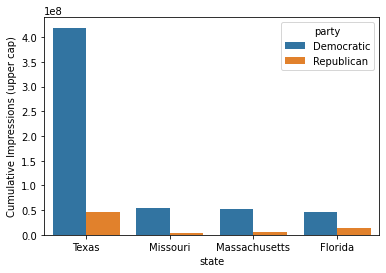

In [32]:
spending_by_state = pd.DataFrame(df.groupby(['state', 'party'])['impressions_lower', 'impressions_upper'].sum().reset_index()).sort_values(by='impressions_upper', ascending=False)
spending_by_state = spending_by_state[spending_by_state.state.isin(['Texas', 'Missouri', 'Massachusetts', 'Florida'])]
sns.barplot(x=spending_by_state['state'], y=spending_by_state['impressions_upper'], hue=spending_by_state['party'])
plt.ylabel('Cumulative Impressions (upper cap)')
plt.show()

The two graphs below show the cimulative impressions (upper and lower bound) for males and females respectively grouped by state. For a lot of states, the female impressions were more than male impressions

<ipython-input-28-4e9410e252c8>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  impressions = df.groupby(['state', 'party'])['male_impressions_lower', 'male_impressions_upper','female_impressions_lower', 'female_impressions_upper'].sum().reset_index().sort_values(by='male_impressions_upper', ascending=False)


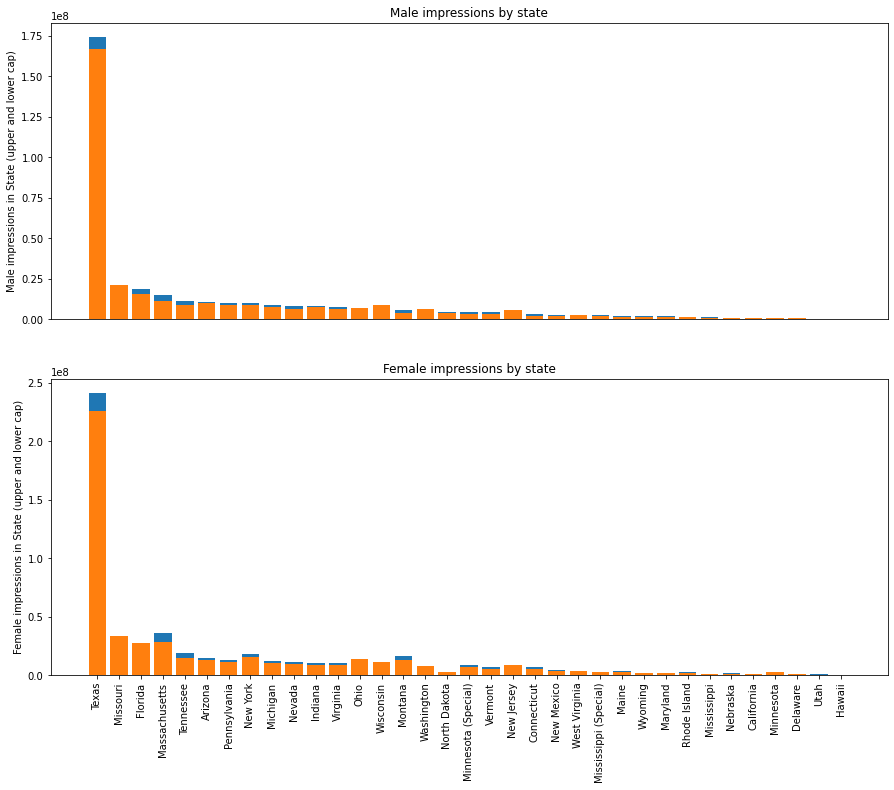

In [28]:
df['male_impressions_upper'] = df['male']*df['impressions_upper']
df['male_impressions_lower'] = df['male']*df['impressions_lower']
df['female_impressions_upper'] = df['female']*df['impressions_upper']
df['female_impressions_lower'] = df['female']*df['impressions_lower']

fig, ax = plt.subplots(2,1, figsize=(15,12))
impressions = df.groupby(['state', 'party'])['male_impressions_lower', 'male_impressions_upper','female_impressions_lower', 'female_impressions_upper'].sum().reset_index().sort_values(by='male_impressions_upper', ascending=False)
p2 = ax[0].bar(impressions['state'], (impressions['male_impressions_upper']))
p1 = ax[0].bar(impressions['state'], impressions['male_impressions_lower'])
ax[0].set_ylabel('Male impressions in State (upper and lower cap)')
ax[0].axes.xaxis.set_visible(False)
ax[0].set_title('Male impressions by state')

p2 = ax[1].bar(impressions['state'], impressions['female_impressions_upper'])
p1 = ax[1].bar(impressions['state'], impressions['female_impressions_lower'])
plt.xticks(rotation=90)
ax[1].set_ylabel('Female impressions in State (upper and lower cap)')
ax[1].set_title('Female impressions by state')

plt.show()

The graph below comapares the male and female impressions by party. Democatics and republicans have higher impressions on females than males, whereas democrats and Libertarians have higher impressions on males than females

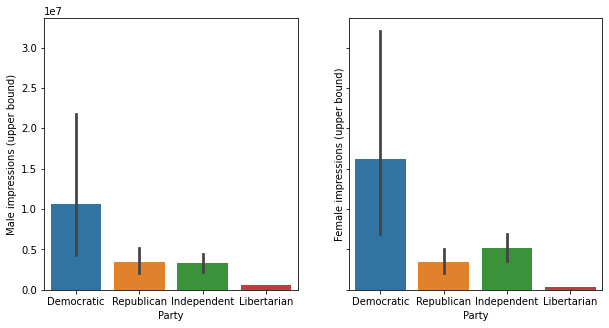

In [39]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(10,5))

sns.barplot(x=impressions['party'], y=impressions['male_impressions_upper'], ax=ax[0])
ax[0].set_ylabel('Male impressions (upper bound)')
ax[0].set_xlabel('Party')
sns.barplot(x=impressions['party'], y=impressions['female_impressions_upper'], ax=ax[1])
ax[1].set_ylabel('Female impressions (upper bound)')
ax[1].set_xlabel('Party')
plt.show()